In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import category_encoders as ce



In [2]:


path = os.path.dirname(os.getcwd()) + '\\data\\'
print(f"CWD:{path}")
csv_files = glob.glob(os.path.join(path, "*.csv"))


# for f in csv_files:
#     filename = f.split('\\')[-1]
#     print(f"File detected:{filename}")
#     single_df = pd.read_csv(f)
    

df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
    

print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

df.info()

#Lets look into top few rows and columns in the dataset
df.head()
display(df)


CWD:C:\Users\Dreamcore\Desktop\work\INF1002 programming fundamentals\project\data\

Number of rows and columns in the data set:  (881884, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  object 
 1   town                 881884 non-null  object 
 2   flat_type            881884 non-null  object 
 3   block                881884 non-null  object 
 4   street_name          881884 non-null  object 
 5   storey_range         881884 non-null  object 
 6   floor_area_sqm       881884 non-null  float64
 7   flat_model           881884 non-null  object 
 8   lease_commence_date  881884 non-null  int64  
 9   resale_price         881884 non-null  float64
 10  remaining_lease      172834 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
881879,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
881880,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
881881,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
881882,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [3]:
# preview data

blacklisted_columns = ["street_name"]

for column in df:
    if column not in blacklisted_columns:
        print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(df[column].unique())}")
        print(df[column].unique())





UNIQUE VALUES: month
VALUES:393
['1990-01' '1990-02' '1990-03' '1990-04' '1990-05' '1990-06' '1990-07'
 '1990-08' '1990-09' '1990-10' '1990-11' '1990-12' '1991-01' '1991-02'
 '1991-03' '1991-04' '1991-05' '1991-06' '1991-07' '1991-08' '1991-09'
 '1991-10' '1991-11' '1991-12' '1992-01' '1992-02' '1992-03' '1992-04'
 '1992-05' '1992-06' '1992-07' '1992-08' '1992-09' '1992-10' '1992-11'
 '1992-12' '1993-01' '1993-02' '1993-03' '1993-04' '1993-05' '1993-06'
 '1993-07' '1993-08' '1993-09' '1993-10' '1993-11' '1993-12' '1994-01'
 '1994-02' '1994-03' '1994-04' '1994-05' '1994-06' '1994-07' '1994-08'
 '1994-09' '1994-10' '1994-11' '1994-12' '1995-01' '1995-02' '1995-03'
 '1995-04' '1995-05' '1995-06' '1995-07' '1995-08' '1995-09' '1995-10'
 '1995-11' '1995-12' '1996-01' '1996-02' '1996-03' '1996-04' '1996-05'
 '1996-06' '1996-07' '1996-08' '1996-09' '1996-10' '1996-11' '1996-12'
 '1997-01' '1997-02' '1997-03' '1997-04' '1997-05' '1997-06' '1997-07'
 '1997-08' '1997-09' '1997-10' '1997-11' '1

In [4]:
e = df[df['town'] == "ANG MO KIO"]

e.info()

#Lets look into top few rows and columns in the dataset
e.head()
display(e)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50343 entries, 0 to 880642
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                50343 non-null  object 
 1   town                 50343 non-null  object 
 2   flat_type            50343 non-null  object 
 3   block                50343 non-null  object 
 4   street_name          50343 non-null  object 
 5   storey_range         50343 non-null  object 
 6   floor_area_sqm       50343 non-null  float64
 7   flat_model           50343 non-null  object 
 8   lease_commence_date  50343 non-null  int64  
 9   resale_price         50343 non-null  float64
 10  remaining_lease      7570 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.6+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
880638,2014-12,ANG MO KIO,5 ROOM,176,ANG MO KIO AVE 4,04 TO 06,138.0,Model A,1993,625000.0,NaN
880639,2014-12,ANG MO KIO,5 ROOM,642,ANG MO KIO AVE 5,13 TO 15,121.0,Improved,1980,618000.0,NaN
880640,2014-12,ANG MO KIO,5 ROOM,700B,ANG MO KIO AVE 6,16 TO 18,111.0,Improved,2003,808000.0,NaN
880641,2014-12,ANG MO KIO,5 ROOM,596B,ANG MO KIO ST 52,07 TO 09,110.0,Improved,2002,745000.0,NaN


In [5]:
# to standardise data
# KIV, current looping is  likely not the most efficient option

# flat type names set to be consistent 
df.loc[df['flat_type'] == "MULTI GENERATION", 'flat_type'] = "MULTI-GENERATION"
df['flat_model'] = df['flat_model'].str.upper()


# # calculate missing remaining_lease value for rows before 2017
# for index, row in df.loc[df['remaining_lease'].isna()].iterrows():
#     # take lease commence date + 99 years, then take the result year and deduct by current year
#     lease_end_year  = int(row["lease_commence_date"]) + 99
#     year_month_pair = row["month"].split("-")
#     current_year = int(year_month_pair[0]) + int(int(year_month_pair[1]) > 7)
#     lease_duration_left = lease_end_year - current_year
#     df.at[index,'remaining_lease'] = lease_duration_left

middle_floor_value = lambda min_floor_str, max_floor_str : int((int(max_floor_str) + int(min_floor_str)) / 2)

for index, row in df.iterrows():
    
    if "year" in str(row['remaining_lease']):
        # if remaining_lease contains words
        remaining_lease_text_list = row["remaining_lease"].split(" ") # split x years y months to ["x", "years", "y", "months"]
        lease_duration_left = int(remaining_lease_text_list[0])

        if len(remaining_lease_text_list) == 4 and "month" in remaining_lease_text_list[3]:  # if a month value is detected in the row
            if int(remaining_lease_text_list[2]) > 7:
                lease_duration_left += 1
        df.at[index,'remaining_lease'] = lease_duration_left
        
    elif pd.isnull(row['remaining_lease']):
        # take lease commence date + 99 years, then take the result year and deduct by current year
        lease_end_year  = int(row["lease_commence_date"]) + 99
        year_month_pair = row["month"].split("-")
        current_year = int(year_month_pair[0]) + int(int(year_month_pair[1]) > 7) # if the current date is 2nd half of the year,  we round the year number up by 1
        lease_duration_left = lease_end_year - current_year
        df.at[index,'remaining_lease'] = lease_duration_left
    
    if "TO" in row["storey_range"]:
        # convert storey_range from e.g. 3 TO 5 to e.g. 4
        storey_range_min_max = row["storey_range"].split("TO")
        mid_floor_value = middle_floor_value(storey_range_min_max[0], storey_range_min_max[1])
        df.at[index,'storey_range'] = mid_floor_value
        
    
# now that month has been used to calculate remaining lease, we convert the month into a format that the 
# regression model understands
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].map(dt.datetime.toordinal)

# set remaining_lease values for records 2017 or later, as they are in the format of x years +-(y months)
# for index, row in df.loc["year" in df['remaining_lease']].iterrows():
#     remaining_lease_text_list = row["remaining_lease"].split(" ") # split x years y months to ["x", "years", "y", "months"]
#     lease_duration_left = int(remaining_lease_text_list[0])
    
#     if len(remaining_lease_text_list) == 4 and "month" in remaining_lease_text_list[3]:  # if a month value is detected in the row
#         if int(remaining_lease_text_list[2]) > 7:
#             lease_duration_left += 1
#     df.at[index,'remaining_lease'] = lease_duration_left

for column in df:
    if column not in blacklisted_columns:
        print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(df[column].unique())}")
        print(df[column].unique())




UNIQUE VALUES: month
VALUES:393
[726468 726499 726527 726558 726588 726619 726649 726680 726711 726741
 726772 726802 726833 726864 726892 726923 726953 726984 727014 727045
 727076 727106 727137 727167 727198 727229 727258 727289 727319 727350
 727380 727411 727442 727472 727503 727533 727564 727595 727623 727654
 727684 727715 727745 727776 727807 727837 727868 727898 727929 727960
 727988 728019 728049 728080 728110 728141 728172 728202 728233 728263
 728294 728325 728353 728384 728414 728445 728475 728506 728537 728567
 728598 728628 728659 728690 728719 728750 728780 728811 728841 728872
 728903 728933 728964 728994 729025 729056 729084 729115 729145 729176
 729206 729237 729268 729298 729329 729359 729390 729421 729449 729480
 729510 729541 729571 729602 729633 729663 729694 729724 729755 729786
 729814 729845 729875 729906 729936 729967 729998 730028 730059 730089
 730120 730151 730180 730211 730241 730272 730302 730333 730364 730394
 730425 730455 730486 730517 730545 730576 

In [44]:
# encode cetegorical data: town, flat type and flat model



# either binary or base-n, depending on how mnyextra columns you need to show categorical data
ce_town = ce.BinaryEncoder(cols=['town']) 
ce_flat_type = ce.BinaryEncoder(cols=['flat_type']) 
ce_flat_model = ce.BinaryEncoder(cols=['flat_model']) 

transformed_df = ce_town.fit_transform(df)
transformed_df = ce_flat_type.fit_transform(transformed_df)
transformed_df = ce_flat_model.fit_transform(transformed_df)
transformed_df.head()

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,block,...,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,resale_price,remaining_lease
0,726468,0,0,0,0,1,0,0,1,309,...,11,31.0,0,0,0,0,1,1977,9000.0,86
1,726468,0,0,0,0,1,0,0,1,309,...,5,31.0,0,0,0,0,1,1977,6000.0,86
2,726468,0,0,0,0,1,0,0,1,309,...,11,31.0,0,0,0,0,1,1977,8000.0,86
3,726468,0,0,0,0,1,0,0,1,309,...,8,31.0,0,0,0,0,1,1977,6000.0,86
4,726468,0,0,0,0,1,0,1,0,216,...,5,73.0,0,0,0,1,0,1976,47200.0,85


In [7]:
# #standardise remaining_lease value
# for index, row in df.loc[df['remaining_lease'].isna()].iterrows():
#     # take lease commence date + 99 years, then take the result year and deduct by current year
    
#     current_year_month = row["month"].split("-")
#     print(current_year_month)
#     break
for column in transformed_df:
    if column not in blacklisted_columns:
        print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(transformed_df[column].unique())}")
        print(transformed_df[column].unique())
transformed_df.info()
display(transformed_df[['month','block', 'street_name', 'storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease']])



UNIQUE VALUES: month
VALUES:393
[726468 726499 726527 726558 726588 726619 726649 726680 726711 726741
 726772 726802 726833 726864 726892 726923 726953 726984 727014 727045
 727076 727106 727137 727167 727198 727229 727258 727289 727319 727350
 727380 727411 727442 727472 727503 727533 727564 727595 727623 727654
 727684 727715 727745 727776 727807 727837 727868 727898 727929 727960
 727988 728019 728049 728080 728110 728141 728172 728202 728233 728263
 728294 728325 728353 728384 728414 728445 728475 728506 728537 728567
 728598 728628 728659 728690 728719 728750 728780 728811 728841 728872
 728903 728933 728964 728994 729025 729056 729084 729115 729145 729176
 729206 729237 729268 729298 729329 729359 729390 729421 729449 729480
 729510 729541 729571 729602 729633 729663 729694 729724 729755 729786
 729814 729845 729875 729906 729936 729967 729998 730028 730059 730089
 730120 730151 730180 730211 730241 730272 730302 730333 730364 730394
 730425 730455 730486 730517 730545 730576 

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,726468,309,ANG MO KIO AVE 1,11,31.0,1977,9000.0,86
1,726468,309,ANG MO KIO AVE 1,5,31.0,1977,6000.0,86
2,726468,309,ANG MO KIO AVE 1,11,31.0,1977,8000.0,86
3,726468,309,ANG MO KIO AVE 1,8,31.0,1977,6000.0,86
4,726468,216,ANG MO KIO AVE 1,5,73.0,1976,47200.0,85
...,...,...,...,...,...,...,...,...
881879,735568,816,YISHUN ST 81,11,122.0,1988,580000.0,72
881880,735568,325,YISHUN CTRL,11,146.0,1988,540000.0,72
881881,735568,618,YISHUN RING RD,8,164.0,1992,738000.0,76
881882,735568,277,YISHUN ST 22,8,152.0,1985,592000.0,69


In [45]:
# the hail mary: removing a column
# removing street name and block, as the ML model will use the town column as the address category 
# maybe removing month? idk man

columns_to_remove = ['street_name', 'block']

for col in columns_to_remove:
    if col in transformed_df.columns:
        transformed_df = transformed_df.drop(col, axis=1)
    else:
        print(f"'{col}' column not found. skipping...")

In [9]:
# todo list:

# see if you can convert block number ad street name to geolocation. if not, just take out the letter suffixes

# apply categorical data endocing to town, flat type and flat model. 
# not sure what to do with street name

In [46]:
display(transformed_df)

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,resale_price,remaining_lease
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,9000.0,86
1,726468,0,0,0,0,1,0,0,1,5,31.0,0,0,0,0,1,1977,6000.0,86
2,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,8000.0,86
3,726468,0,0,0,0,1,0,0,1,8,31.0,0,0,0,0,1,1977,6000.0,86
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,47200.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881879,735568,1,0,1,1,0,1,0,0,11,122.0,0,0,0,0,1,1988,580000.0,72
881880,735568,1,0,1,1,0,1,1,0,11,146.0,0,1,0,0,0,1988,540000.0,72
881881,735568,1,0,1,1,0,1,1,0,8,164.0,0,0,1,1,1,1992,738000.0,76
881882,735568,1,0,1,1,0,1,1,0,8,152.0,0,1,0,0,0,1985,592000.0,69


5000.0 1418000.0


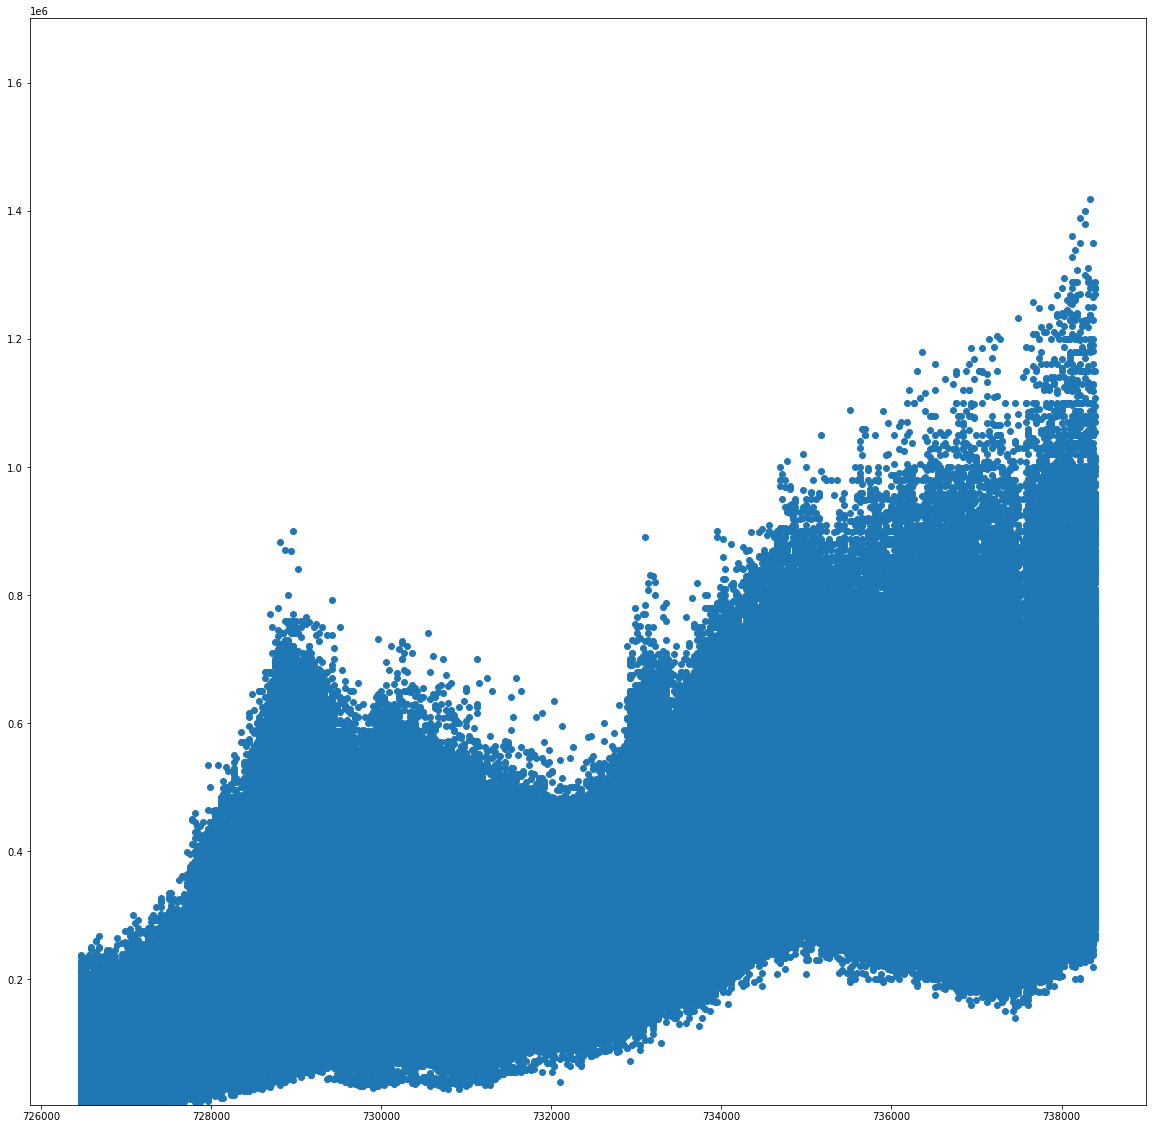

In [31]:
x = transformed_df.loc[:,'month']
y = transformed_df.loc[:,'resale_price']

min_resale_price = df['resale_price'].min()
max_resale_price = df['resale_price'].max()

print(min_resale_price, max_resale_price)
plt.subplots(figsize=(20, 20))
plt.ylim(min_resale_price * 0.8, max_resale_price * 1.2)
plt.yscale('linear')

plt.scatter(x, y)
plt.show()


In [47]:

cols = list(transformed_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('resale_price'))
transformed_df = transformed_df[cols+['resale_price']] #Create new dataframe with columns in the order you want


x = transformed_df.iloc[:,0:-1]  # contains all independent variables required for the model to derive the resale price
y = transformed_df.iloc[:,-1] # series object containing all resale price data

x.info()
display(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  int64  
 1   town_0               881884 non-null  int64  
 2   town_1               881884 non-null  int64  
 3   town_2               881884 non-null  int64  
 4   town_3               881884 non-null  int64  
 5   town_4               881884 non-null  int64  
 6   flat_type_0          881884 non-null  int64  
 7   flat_type_1          881884 non-null  int64  
 8   flat_type_2          881884 non-null  int64  
 9   storey_range         881884 non-null  object 
 10  floor_area_sqm       881884 non-null  float64
 11  flat_model_0         881884 non-null  int64  
 12  flat_model_1         881884 non-null  int64  
 13  flat_model_2         881884 non-null  int64  
 14  flat_model_3         881884 non-null  int64  
 15  flat_model_4     

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,remaining_lease
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
1,726468,0,0,0,0,1,0,0,1,5,31.0,0,0,0,0,1,1977,86
2,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
3,726468,0,0,0,0,1,0,0,1,8,31.0,0,0,0,0,1,1977,86
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881879,735568,1,0,1,1,0,1,0,0,11,122.0,0,0,0,0,1,1988,72
881880,735568,1,0,1,1,0,1,1,0,11,146.0,0,1,0,0,0,1988,72
881881,735568,1,0,1,1,0,1,1,0,8,164.0,0,0,1,1,1,1992,76
881882,735568,1,0,1,1,0,1,1,0,8,152.0,0,1,0,0,0,1985,69


In [48]:
y.info()
display(y)

<class 'pandas.core.series.Series'>
RangeIndex: 881884 entries, 0 to 881883
Series name: resale_price
Non-Null Count   Dtype  
--------------   -----  
881884 non-null  float64
dtypes: float64(1)
memory usage: 6.7 MB


0           9000.0
1           6000.0
2           8000.0
3           6000.0
4          47200.0
            ...   
881879    580000.0
881880    540000.0
881881    738000.0
881882    592000.0
881883    545000.0
Name: resale_price, Length: 881884, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

display(y_train)

from sklearn.linear_model import LinearRegression

naive_linear_reg = LinearRegression()
naive_linear_reg.fit(x_train,y_train)

predicted_result = naive_linear_reg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ",np.sqrt(mean_squared_error(y_test,predicted_result)))
print("R2: ",r2_score(y_test,predicted_result))
print("RMSE: ",naive_linear_reg.score(x_test,y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


177494    312000.0
833856    310000.0
402036    138000.0
710043    560000.0
671181    415000.0
            ...   
88683     316800.0
48816     346000.0
192468    153000.0
556208    283000.0
766751    380000.0
Name: resale_price, Length: 617318, dtype: float64

LinearRegression()

In [55]:
from sklearn import preprocessing
#polynomial conversion + plain linear regression - ----- Most accurate

poly_features = preprocessing.PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.4)

polynomial_regression = LinearRegression(fit_intercept=True, n_jobs=1, normalize=False)

polynomial_regression.fit(x_train,y_train) # fit sample values to sample answers

predicted_result = polynomial_regression.predict(x_test)
print("MSE: ",np.sqrt(mean_squared_error(y_test,predicted_result)))
print("R2: ",r2_score(y_test,predicted_result))
print("RMSE: ",polynomial_regression.score(x_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


MSE:  67308.86655952474
R2:  0.822395224756147
RMSE:  0.822395224756147


In [54]:
display(x)

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,remaining_lease
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
1,726468,0,0,0,0,1,0,0,1,5,31.0,0,0,0,0,1,1977,86
2,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
3,726468,0,0,0,0,1,0,0,1,8,31.0,0,0,0,0,1,1977,86
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881879,735568,1,0,1,1,0,1,0,0,11,122.0,0,0,0,0,1,1988,72
881880,735568,1,0,1,1,0,1,1,0,11,146.0,0,1,0,0,0,1988,72
881881,735568,1,0,1,1,0,1,1,0,8,164.0,0,0,1,1,1,1992,76
881882,735568,1,0,1,1,0,1,1,0,8,152.0,0,1,0,0,0,1985,69
